In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import pandas as pd
import HurstEstimator as he

# Beta

$\newcommand{\E}{\mathrm{E}}$
$\newcommand{\Var}{\mathrm{Var}}$
$\newcommand{\Cov}{\mathrm{Cov}}$
We can see over the 10 year period there is a range of hurst exponents among the stocks and the hurst expoenent estimated isn't easily seen by just examining the graph alone. We see that Apple and Alcoa stocks have the two highest hurst exponents exhibiting very heavy persistence. On the low end we see Pepsi, AT&R, and Exxon exhibiting anti-persistence. What causes this difference? 

Prima facie XOM, T, Pep are heavy dividend stocks. As of April 11,2020 they have dividend yields of 8%, 6.77%, and 2.86% respectively. So XOM has a below average dividend yield, but is still very anti persistent. So dividend yields do not necessarily explain the Hurst expoenent especially when we condsider JNJ and KO which area also very beloved by divdend minded investors.

How does the Hurst exponent compares to other measures, say Beta for instance. Beta is the statistical measure of a given stock that measures how changes in stock price correlate to changes in the overall market. 


$$
\beta = \frac{\Cov(\Delta \Gamma, \Delta \gamma)}{\Var(\Delta \Gamma)}
$$

$\Gamma$ is the price of the aggregate market index and $\gamma$ is the individual stock.

$\beta$ can change over time (more on that later) just like the hurst exponent so we'll want to estimate it for the period above.

Furthermore $\beta$ is the estimated slope of ordinary least squares fit with the market change as an independent variable and the stock change as the dependent variable.

As a proxy for the SP500 we can use the spy etf which is designed to track the SP500 and then find the needed statistics. However we need to find the difference between the close and the open and then run a beta function. Pandas does have a covariance matrix function, but instead we will extract specifically the information we need with a little python.

In [10]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override() 


# We want a new stock set to grab the end and generate a percentage return each day
stocks = ("SPY", "MSFT","AAPL","T","DDD","JNJ","KO","Pep","MCD", "AA", "XOM", "GOOG", "AMZN")
stocks = sorted(stocks)
ST = ' '.join(stocks)
data2 = yf.download(ST, start="2000-01-01", end="2017-04-30", index = stocks)
data2 = data2[['Open', 'Close']]
DailyReturn = (data2.Close - data2.Open)/data2.Open

[*********************100%***********************]  13 of 13 completed


Text(0.5, 1.0, 'Estimated Beta')

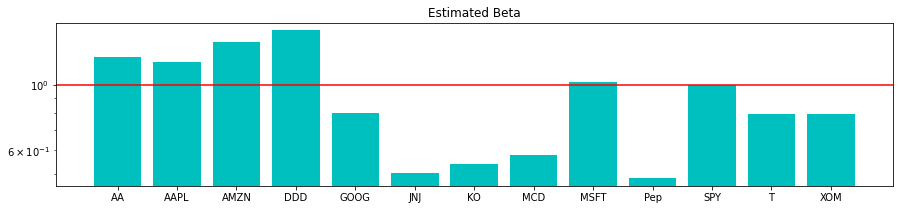

In [12]:
CovMatrix = DailyReturn.cov()
SpyVar = CovMatrix.loc['SPY', 'SPY']
StockCov = CovMatrix.loc['SPY']
Beta = StockCov/SpyVar

plt.figure(figsize = (15,3))
yy = range(len(Beta))
plt.bar(yy,Beta, color = 'c', log=True, width=0.8)
plt.axhline(y=1, color='r', linestyle='-')
ax = plt.gca()
ax.set_xticks(yy)
ax.set_xticklabels(stocks)
plt.title('Estimated Beta')

In [ ]:
popt, pcov = curve_fit(func,Beta, hurstValues)
fig = plt.figure(figsize=(13,7))
plt.plot(Beta,hurstValues, 'o')
plt.plot(Beta,func(Beta,*popt),'r--',label='Least Squares Regression')
plt.title('Estimated Hurst Exponents plotted against Estimated Beta')
plt.xlabel('Beta')
plt.ylabel('H')
plt.legend()

In [ ]:
hurstValues = np.zeros((len(data1.columns),1))
for i in range(len(data1.columns)):
    xx = data1.iloc[:,[i]]
    xx = xx.dropna()
    xx = xx.to_numpy()
    hurstValues[i] = he.hurstEstimator(xx,10,cumulative=True, graph=False)

In [ ]:
popt, pcov = curve_fit(func,Beta, hurstValues)
fig = plt.figure(figsize=(13,7))
plt.plot(Beta,hurstValues, 'o')
plt.plot(Beta,func(Beta,*popt),'r--',label='Least Squares Regression')
plt.title('Estimated Hurst Exponents plotted against Estimated Beta')
plt.xlabel('Beta')
plt.ylabel('H')
plt.legend()